## Exercise 1

In [8]:
import pandas as pd
import seaborn as sns

kommuner = pd.Series(("Malmö", "Stockholm", "Uppsala", "Göteborg"))
#population = pd.Series(dict(Malmö=347949, Stockholm=975551, Uppsala=233839, Göteborg=583056))
population = pd.Series((347949, 975551, 233839,  583056))


df = pd.DataFrame({"Kommun":kommuner, "Population":population})
df
print(df.loc[[3]])




     Kommun  Population
3  Göteborg      583056


In [9]:
print(df.sort_values(by="Population", ascending=False))

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839


In [10]:
print(df.sort_values(by="Population", ascending=False).iloc[0:3])

      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


In [11]:
percentage = pd.Series((347949/10379295, 975551/10379295, 233839/10379295, 583056/10379295))
df = pd.DataFrame({"Kommun":kommuner, "Population":population, "PercentOfTotalPop":percentage})
df

,Kommun,Population,PercentOfTotalPop
0,Malmö,347949,0.033523
1,Stockholm,975551,0.093990
2,Uppsala,233839,0.022529
3,Göteborg,583056,0.056175


## Exercise 2

In [12]:
df2 = pd.read_excel("../Data/komtopp50_2020.xlsx")
df2.head()



,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sveriges 50 största kommuner efter folkmängd,",NaN,NaN,NaN,NaN,NaN
2,31 december 2020 jämfört med 31 december 2019,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [13]:
df2.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [14]:
df2 = df2.rename(columns={"Unnamed: 0":"2020","Unnamed: 1":"2019", "Unnamed: 2":"Kommun", "Unnamed: 3":"Folkmängd 31dc 2020", "Unnamed: 4":"Folkmängd 31dc 2019", "Unnamed: 5":"Förändring"})
df2.head()

,2020,2019,Kommun,Folkmängd 31dc 2020,Folkmängd 31dc 2019,Förändring
0,NaN,NaN,NaN,NaN,NaN,NaN
1,"Sveriges 50 största kommuner efter folkmängd,",NaN,NaN,NaN,NaN,NaN
2,31 december 2020 jämfört med 31 december 2019,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring


In [15]:
#df2.sort_values(by="Kommun")
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)
df2.head()

,2020,2019,Kommun,Folkmängd 31dc 2020,Folkmängd 31dc 2019,Förändring
0,1,1.0,Stockholm,975551,974073.0,1478
1,2,2.0,Göteborg,583056,579281.0,3775
2,3,3.0,Malmö,347949,344166.0,3783
3,4,4.0,Uppsala,233839,230767.0,3072
4,5,5.0,Linköping,164616,163051.0,1565


In [16]:
df2 = df2.sort_values("Folkmängd 31dc 2020", ascending=False)
df2.head()

df2.iloc[:45]
df2.head()

,2020,2019,Kommun,Folkmängd 31dc 2020,Folkmängd 31dc 2019,Förändring
0,1,1.0,Stockholm,975551,974073.0,1478
1,2,2.0,Göteborg,583056,579281.0,3775
2,3,3.0,Malmö,347949,344166.0,3783
3,4,4.0,Uppsala,233839,230767.0,3072
4,5,5.0,Linköping,164616,163051.0,1565


In [17]:
df2.sum() # Total pop 2020 "6227447"
          # Total pop 2019 "6187016"

2020                                                                1275
2019                                                              1275.0
Kommun                 StockholmGöteborgMalmöUppsalaLinköpingÖrebroVä...
Folkmängd 31dc 2020                                              6227447
Folkmängd 31dc 2019                                            6187016.0
Förändring                                                         40431
dtype: object

In [18]:
df2.head()
#df2.tail()

,2020,2019,Kommun,Folkmängd 31dc 2020,Folkmängd 31dc 2019,Förändring
0,1,1.0,Stockholm,975551,974073.0,1478
1,2,2.0,Göteborg,583056,579281.0,3775
2,3,3.0,Malmö,347949,344166.0,3783
3,4,4.0,Uppsala,233839,230767.0,3072
4,5,5.0,Linköping,164616,163051.0,1565


<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 31dc 2020'>

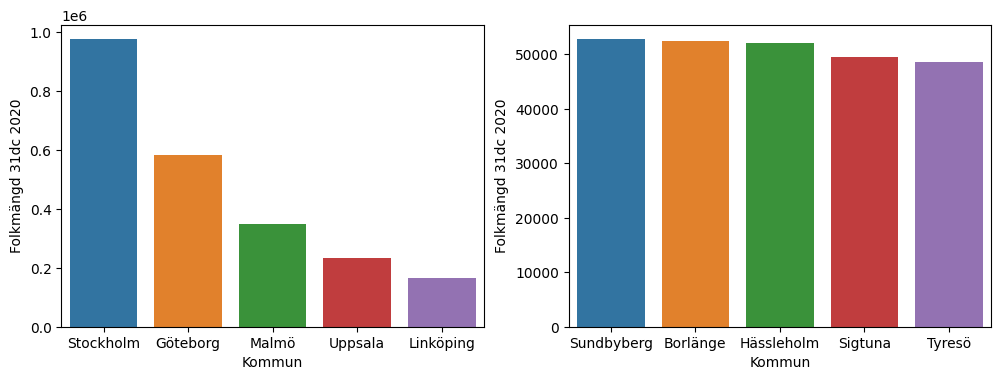

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, dpi=100, figsize=(12,4))
sns.barplot(data=df2.head(5), x="Kommun", y="Folkmängd 31dc 2020",ax=ax[0],)
sns.barplot(data=df2.tail(5), x="Kommun", y="Folkmängd 31dc 2020",ax=ax[1],)